In [ ]:
# precipitable water at different levels
# da = hus.sel(plev = slice(1000e2, 500e2))
# pw_lower = xr.DataArray(
#     data=-scipy.integrate.simpson(da.fillna(0), da.plev.data, axis=1, even='last'),
#     dims=['time','lat', 'lon'],
#     coords={'time': da.time.data, 'lat': da.lat.data, 'lon': da.lon.data},
#     attrs={'units':'mm/day',
#             'Description': 'precipitable water'}
#     )

# da = hus.sel(plev = slice(500e2, 10e2))
# pw_upper = xr.DataArray(
#     data=-scipy.integrate.simpson(da.fillna(0), da.plev.data, axis=1, even='last'),
#     dims=['time','lat', 'lon'],
#     coords={'time': da.time.data, 'lat': da.lat.data, 'lon': da.lon.data},
#     attrs={'units':'mm/day',
#             'Description': 'precipitable water'}
#     )

In [1]:
# power specturm
# import xrft
# pw_fourier = xrft.dft(pw.values, dim='time', shift=False)
# power_spectrum = (pw_fourier*pw_fourier.conj()).real
#
# or
# 
# power_spectrum = xrft.power_spectrum(pw, dim='time', detrend='constant', window=True, chunks_per_segment=None, 
#                                     noverlap=None, padded=True, return_fft=False, shift=False)




3

In [ ]:
# missing values rioxarray, 2d interpolation
# import rioxarray
# data_interpRio = data.rio.interpolate_na()


In [1]:
# plot time in title
#  plt.title("Time = " + str(tas.coords['time'].values[i])[:13])

In [ ]:
# precipitable water of each layer
# precipitable water from using mean or difference in specific humidity
# delta_hus = hus.diff(dim='plev')
# plevs = hus['plev']
# plev_inc = plevs.diff(dim='plev')
# pw_plev = plev_inc * delta_hus


# precipitable water of each layer using quadratic interpolation and formula
# Select the 'hus' variable and the pressure levels you want to interpolate between
# plevs = data['plev']
# hus = data['hus']
# plev_low = 1000  # Lower pressure level
# plev_high = 500  # Higher pressure level

# # Interpolate the 'hus' values at the pressure levels
# hus_low = hus.interp(plev=plev_low, method='quadratic')
# hus_high = hus.interp(plev=plev_high, method='quadratic')

# # Calculate the width of the pressure level interval
# plev_inc = plev_high - plev_low

# # Create a new pressure level array that includes the pressure levels in between hus_low and hus_high
# plevs_interp = np.arange(plev_low, plev_high, 100)  # Pressure levels in 100 hPa increments

# # Interpolate the 'hus' values at the intermediate pressure levels
# hus_interp = hus.interp(plev=plevs_interp, method='quadratic')

# # Calculate the precipitable water using Simpson's rule
# pw = (plev_inc / 3) * (hus_low + 4 * hus_interp + hus_high)



# plevs = pw_plev['plev']
# lat = hus.lat
# lon = hus.lon
# lonm,latm = np.meshgrid(lon,lat)

# fig, axs = plt.subplots(4, 2, figsize=(22.5, 15),
#                         subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

# fig.suptitle('tMean precipitable water at different pressure levels, ' + experiment, fontsize=18, y=0.90)

# for ax, plev in zip(axs.flat, plevs):

#     pcm= ax.pcolormesh(lonm,latm, pw_plev.mean(dim='time').sel(plev = plev),transform=ccrs.PlateCarree(),zorder=0, cmap='Greens') #,vmin=0,vmax=12)
#     ax.add_feature(cfeat.COASTLINE)
#     ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
#     ax.set_title('plev ' + str(plev.data) + ' pa ' + model)

#     # if plev == 85000:
#     #     plt.text(1, 1, 'tMean Specific humidity at different pressure levels ' + experiment,fontsize=18)

#     if plev <= 5000:
#         ax.set_xlabel('longitude')
#         plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.15, aspect=50, fraction=0.055, label = 'precipitable water [mm/day]')
#     else:
#         plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.15, aspect=50, fraction=0.055)

#     if plev == 85000 or plev ==50000 or plev == 10000 or plev ==1000:
#         ax.set_ylabel('latitude')

#     ax.set_yticks([-20, 0, 20])
#     ax.set_xticks([-180, -90, 0, 90, 180])
#     ax.set_xticklabels([0, 90, 180, 270, 360])



# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.075, hspace=0.001)
# axs[-1, 1].remove()


In [ ]:
# assigning new coordinates, like time
# tas_sMean1 = tas_sMean1.assign_coords(time=tas_sMean2.time.data)
# np.array_equal(tas_sMean1.time.data,tas_sMean2.time.data), checking if arrays are equal

In [21]:
# data to test on
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from os.path import expanduser
home = expanduser("~")

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6 # cannot concatanate files for rcp85 run
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
model = models[0]


experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]


folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_tas_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)

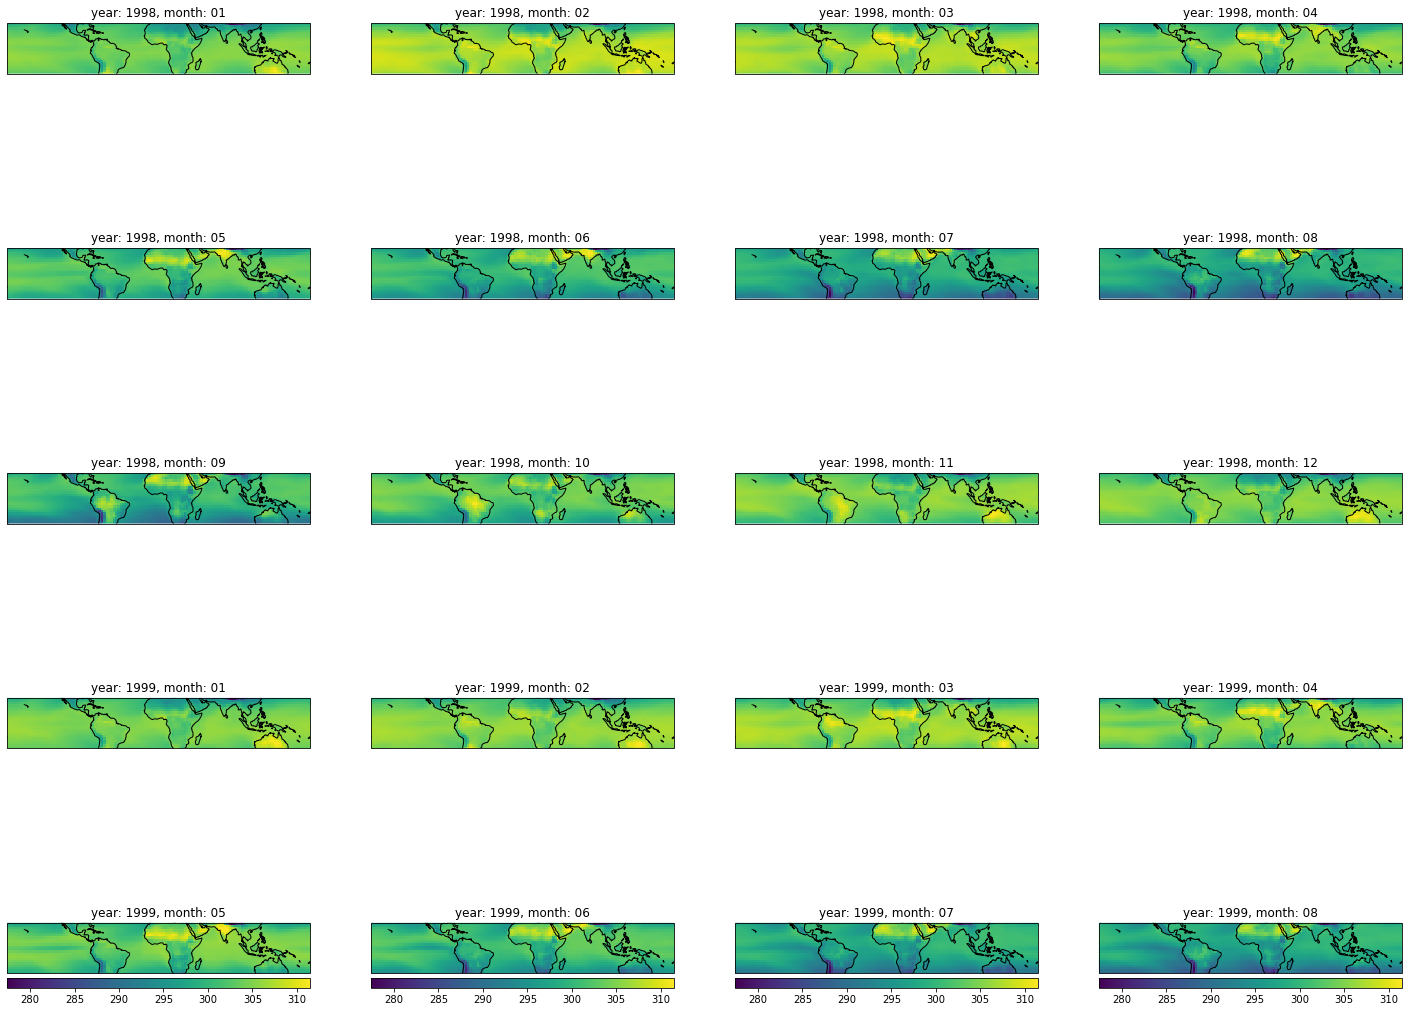

In [44]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 


# Select the first 20 times and latitude/longitude values
times = ds['time'][:20]
lats = ds['lat'].sel(lat=slice(-30, 30))  # Select latitudes from -30 to 30
lons = ds['lon']

# Create a figure with 5 rows and 4 columns of subplots
fig, axs = plt.subplots(5, 4, figsize=(25, 20),
                        subplot_kw={'projection': ccrs.PlateCarree()})
 
#fig.suptitle('rome (annual time mean) ' + experiment, fontsize=18, y=0.95)

# Iterate over the subplots and plot the air temperature
for ax, time in zip(axs.flat, times):
    temperature = ds['tas'].sel(time=time, lat=slice(-30, 30))  # Select latitudes from -30 to 30
    im = temperature.plot.pcolormesh(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree(), add_colorbar=False)
    ax.set_extent([90, 270, -30, 30], crs=ccrs.PlateCarree())  # Set the extent of the plot
    ax.coastlines()  # Add coastlines to the plot
    ax.set_title('year: 19' + time.dt.strftime("%y").data + ', month: ' + time.dt.strftime("%m").data)  # Remove the title
    ax.set_ylabel('latitude')

# Add a colorbar to each subplot in the bottom row
for ax in axs[-1, :]:
    ax.set_xlabel('longitude')
    cbar_ax = fig.add_axes([ax.get_position().x0+0.0,
                            ax.get_position().y0-0.01,
                            (ax.get_position().x1-ax.get_position().x0),
                            (ax.get_position().y1-ax.get_position().y0)/5])  # Add a new axis for the colorbar
    fig.colorbar(im, cax=cbar_ax, orientation='horizontal')  # Create the colorbar

for ax in axs[:, 0]:
    ax.set_ylabel('latitude')


#plt.text(-30,725, 'Rx1day (annual time mean) ' + experiment,fontsize=18)
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.1, hspace=0.5)

# Show the plot
plt.show()

In [16]:
print(time.dt.strftime("%d").data)

16


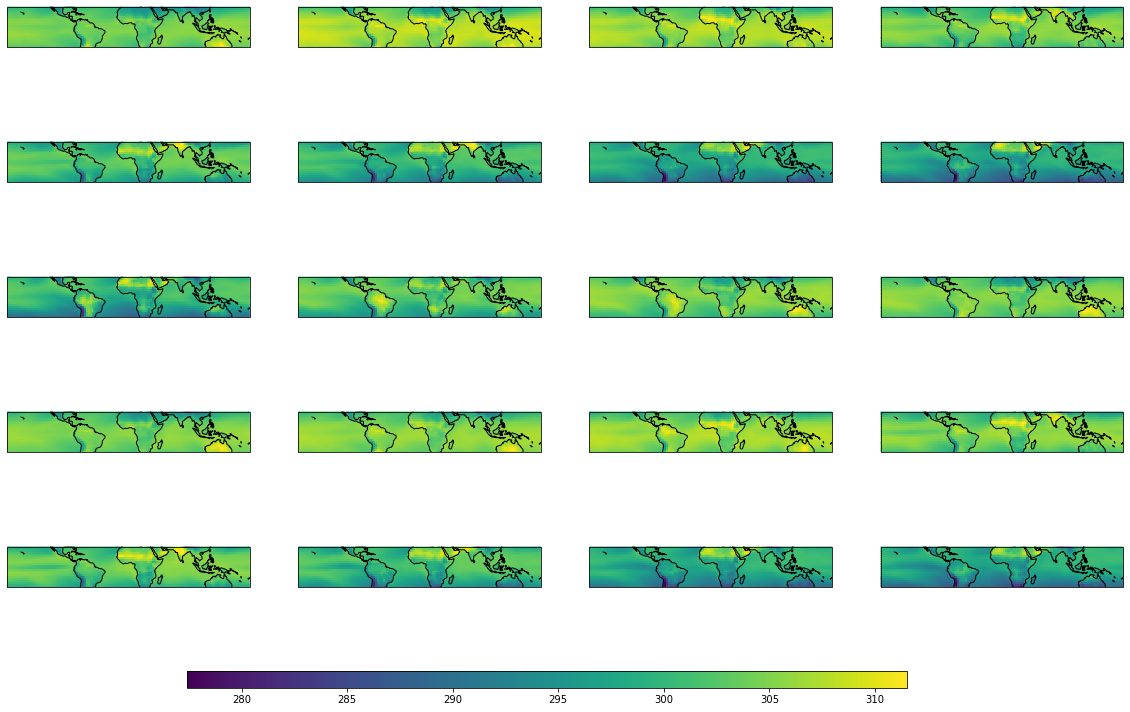

In [23]:
# import xarray as xr
# import cartopy.crs as ccrs
# import matplotlib.pyplot as plt



# # Select the first 20 times and latitude/longitude values
# times = ds['time'][:20]
# lats = ds['lat'].sel(lat=slice(-30, 30))  # Select latitudes from -30 to 30
# lons = ds['lon']

# # Create a figure with 5 rows and 4 columns of subplots
# fig, axs = plt.subplots(5, 4, figsize=(20, 12),
#                         subplot_kw={'projection': ccrs.PlateCarree()})

# # Iterate over the subplots and plot the air temperature
# for ax, time in zip(axs.flat, times):
#     temperature = ds['tas'].sel(time=time, lat=slice(-30, 30))  # Select latitudes from -30 to 30
#     im = temperature.plot.pcolormesh(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree(), add_colorbar=False)
#     ax.set_extent([90, 270, -30, 30], crs=ccrs.PlateCarree())  # Set the extent of the plot
#     ax.coastlines()  # Add coastlines to the plot
#     ax.set_title('')  # Remove the title

# # Add a colorbar below the subplots
# cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.02])  # Add a new axis for the colorbar
# fig.colorbar(im, cax=cbar_ax, orientation='horizontal')  # Create the colorbar

# # Show the plot
# plt.show()

In [ ]:
# time ranges
# datetimeindex = precip.indexes['time'].to_datetimeindex()
# precip['time'] = datetimeindex

#time_range = xr.cftime_range(start='1970', end='2000', freq='D', closed='left', calendar='noleap')


In [ ]:
# delete cartopy axes

# # Define the figure and each axis for the 3 rows and 3 columns
# fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
#                         subplot_kw={'projection': ccrs.PlateCarree()},
#                         figsize=(11,8.5))

# # axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
# axs=axs.flatten()

# #Loop over all of the models
# for i,model in enumerate(models):

#         # Select the week 1 forecast from the specified model
#         data=ds[model][0,:,:]

#         # Add the cyclic point
#         data,lons=add_cyclic_point(data,coord=ds['lon'])

#         # Contour plot
#         cs=axs[i].contourf(lons,ds['lat'],data,
#                           transform = ccrs.PlateCarree(),
#                           cmap='coolwarm',extend='both')

#         # Title each subplot with the name of the model
#         axs[i].set_title(model)

#         # Draw the coastines for each subplot
#         axs[i].coastlines()

# # Delete the unwanted axes
# for i in [7,8]:
#     fig.delaxes(axs[i])

In [ ]:
# # cartopy subplots

# # Define the contour levels to use in plt.contourf
# clevs=np.arange(-12,13,1)


# # Define the figure and each axis for the 3 rows and 3 columns
# fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
#                         subplot_kw={'projection': ccrs.PlateCarree()},
#                         figsize=(11,8.5))

# # axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
# axs=axs.flatten()

# #Loop over all of the models
# for i,model in enumerate(models):

#         # Select the week 1 forecast from the specified model
#         data=ds[model][0,:,:]

#         # Add the cyclic point
#         data,lons=add_cyclic_point(data,coord=ds['lon'])

#         # Contour plot
#         cs=axs[i].contourf(lons,ds['lat'],data,clevs,
#                           transform = ccrs.PlateCarree(),
#                           cmap='coolwarm',extend='both')

#         # Title each subplot with the name of the model
#         axs[i].set_title(model)

#         # Draw the coastines for each subplot
#         axs[i].coastlines()

#         # Longitude labels
#         axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
#         lon_formatter = cticker.LongitudeFormatter()
#         axs[i].xaxis.set_major_formatter(lon_formatter)

#         # Latitude labels
#         axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
#         lat_formatter = cticker.LatitudeFormatter()
#         axs[i].yaxis.set_major_formatter(lat_formatter)

# # Delete the unwanted axes
# for i in [7,8]:
#     fig.delaxes(axs[i])

# # Adjust the location of the subplots on the page to make room for the colorbar
# fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
#                     wspace=0.1, hspace=0.5)

# # Add a colorbar axis at the bottom of the graph
# cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])

# # Draw the colorbar
# cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
# # Add a big title at the top
# plt.suptitle('SubX Week 1 2m Temperature Anomalies ($^\circ$C): Apr 16, 2020 Initialized Forecasts')

In [ ]:
# f, axs = plt.subplots(5, 4, figsize=(25, 20),
#                         subplot_kw={'projection': ccrs.PlateCarree()})

# lat = rxday.lat
# lon = rxday.lon
# lonm,latm = np.meshgrid(lon,lat)

# for i, model, ax in enumerate(models):
#     if switch['local_files']:
#         folder = home + '/Documents/data/cmip5/' + model

#     if switch['nci_files']:
#         folder = '/g/data/k10/cb4968/data/cmip5/'+ model


#     fileName = model + '_pr_rxday_' + experiment + '.nc'
#     path = folder + '/' + fileName
#     rxday = xr.open_dataset(path)

#     ax= fig.add_subplot(5,4,i+1, projection=ccrs.PlateCarree(central_longitude=180)) #gridspec, specify subplot size here
#     ax.add_feature(cfeat.COASTLINE)
#     ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())

#     #z = np.transpose(z)

#     pcm= ax.pcolormesh(lonm,latm, rxday.rx1day.mean(dim='time'),transform=ccrs.PlateCarree(),zorder=0, cmap='Blues') #,vmin=0,vmax=12)

#     letters='abcdefghijklmnopqrs'
#     plt.text(-177.5, 32.5, letters[i-1] + ') ' + model, fontsize=12)



# for ax in axs[-1, :]:


#     if i== 0 or i==4 or i==8 or i==12 or i==16:
#         ax.set_yticks([-20, 0, 20])
#         plt.text(-235,-25, 'latitude', rotation=90)


    
#         plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.35, aspect=50, fraction=0.055)
#         plt.text(-25,-70, 'longitude',fontsize=8)
#         plt.text(-75,-135, 'precipitation (mm/day)',fontsize=10)
#         ax.set_xticks([-180, -90, 0, 90, 180])
#         ax.set_xticklabels([0, 90, 180, 270, 360])
#     else:
#         plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.05, aspect=50, fraction=0.055) #shrink=




# plt.text(-30,725, 'Rx1day (annual time mean) ' + experiment,fontsize=18)
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.1) #, hspace=0.2)